# Aula Pandas - 4
## Limpeza e processamento de dados

No dia a dia, com bases reais, encontramos muitos problemas que precisam ser tratados antes de uma aplicação prática. Dados faltantes e dados duplicados são os casos mais frequentes.

In [1]:
import pandas as pd
import numpy as np
import random

### 1. Lendo a nossa tabela

In [2]:
df_exemplo = pd.read_csv('exemplo_aula.csv')

df_exemplo

,Nome,Sexo,Idade,Cidade
0,Andre Nunes,M,26.0,NaN
1,Thiago Santos,M,33.0,NaN
2,Lucas Alves,M,NaN,NaN
3,Ana Beatriz,F,22.0,NaN
4,Luiza Tomazi,F,48.0,NaN
5,Roberta Carvalho,F,39.0,NaN
6,Andre Nunes,M,26.0,NaN
7,Luiz Ricardo,M,-33.0,NaN


### 1.1 Identificando alguns problemas

In [3]:
df_exemplo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nome    8 non-null      object 
 1   Sexo    8 non-null      object 
 2   Idade   7 non-null      float64
 3   Cidade  0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 384.0+ bytes


### 2. Limpeza de dados

In [4]:
df_exemplo.dropna()

,Nome,Sexo,Idade,Cidade


In [6]:
df_exemplo = df_exemplo.dropna(axis=1, how='all')

df_exemplo

,Nome,Sexo,Idade
0,Andre Nunes,M,26.0
1,Thiago Santos,M,33.0
2,Lucas Alves,M,NaN
3,Ana Beatriz,F,22.0
4,Luiza Tomazi,F,48.0
5,Roberta Carvalho,F,39.0
6,Andre Nunes,M,26.0
7,Luiz Ricardo,M,-33.0


In [7]:
df_exemplo.dropna()

,Nome,Sexo,Idade
0,Andre Nunes,M,26.0
1,Thiago Santos,M,33.0
3,Ana Beatriz,F,22.0
4,Luiza Tomazi,F,48.0
5,Roberta Carvalho,F,39.0
6,Andre Nunes,M,26.0
7,Luiz Ricardo,M,-33.0


### Preenchimento de dados faltantes

In [9]:
df_exemplo['Idade'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7    False
Name: Idade, dtype: bool

In [12]:
df_exemplo[df_exemplo['Idade'].isna()]

,Nome,Sexo,Idade
2,Lucas Alves,M,NaN


In [24]:
# Maneira não usual

df_exemplo['Idade'].replace(-33.0, 33.0)

0    26.0
1    33.0
2     NaN
3    22.0
4    48.0
5    39.0
6    26.0
7    33.0
Name: Idade, dtype: float64

In [25]:
# Maneira mais usual

df_exemplo.loc[df_exemplo['Idade'] < 0, 'Idade'] *= -1

df_exemplo

/Users/helder/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Nome,Sexo,Idade
0,Andre Nunes,M,26.0
1,Thiago Santos,M,33.0
2,Lucas Alves,M,NaN
3,Ana Beatriz,F,22.0
4,Luiza Tomazi,F,48.0
5,Roberta Carvalho,F,39.0
6,Andre Nunes,M,26.0
7,Luiz Ricardo,M,33.0


In [29]:
media_idade = df_exemplo['Idade'].mean()


df_exemplo['Idade'] = df_exemplo['Idade'].fillna(media_idade)

<ipython-input-29-4cc19415c394>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exemplo['Idade'] = df_exemplo['Idade'].fillna(media_idade)


In [30]:
df_exemplo

,Nome,Sexo,Idade
0,Andre Nunes,M,26.000000
1,Thiago Santos,M,33.000000
2,Lucas Alves,M,32.428571
3,Ana Beatriz,F,22.000000
4,Luiza Tomazi,F,48.000000
5,Roberta Carvalho,F,39.000000
6,Andre Nunes,M,26.000000
7,Luiz Ricardo,M,33.000000


### Tratando dados duplicados

In [31]:
df_exemplo.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [32]:
# Traz uma maneira de visualizar os dados duplicados

df_exemplo[df_exemplo.duplicated()]

,Nome,Sexo,Idade
6,Andre Nunes,M,26.0


In [35]:
df_exemplo['Estado'] = ['sp', 'rj', 'rs', 'rs', 'rs', 'rs', 'ba', 'se']

In [36]:
df_exemplo

,Nome,Sexo,Idade,Estado
0,Andre Nunes,M,26.000000,sp
1,Thiago Santos,M,33.000000,rj
2,Lucas Alves,M,32.428571,rs
3,Ana Beatriz,F,22.000000,rs
4,Luiza Tomazi,F,48.000000,rs
5,Roberta Carvalho,F,39.000000,rs
6,Andre Nunes,M,26.000000,ba
7,Luiz Ricardo,M,33.000000,se


In [40]:
df_exemplo.drop_duplicates(subset=['Nome', 'Idade'], keep='last')

,Nome,Sexo,Idade,Estado
1,Thiago Santos,M,33.000000,rj
2,Lucas Alves,M,32.428571,rs
3,Ana Beatriz,F,22.000000,rs
4,Luiza Tomazi,F,48.000000,rs
5,Roberta Carvalho,F,39.000000,rs
6,Andre Nunes,M,26.000000,ba
7,Luiz Ricardo,M,33.000000,se


In [41]:
df_exemplo = df_exemplo.drop_duplicates(subset=['Nome', 'Idade'], keep='last')

df_exemplo

,Nome,Sexo,Idade,Estado
1,Thiago Santos,M,33.000000,rj
2,Lucas Alves,M,32.428571,rs
3,Ana Beatriz,F,22.000000,rs
4,Luiza Tomazi,F,48.000000,rs
5,Roberta Carvalho,F,39.000000,rs
6,Andre Nunes,M,26.000000,ba
7,Luiz Ricardo,M,33.000000,se


### 4. Transformação dos dados

### 4.1 cut e qcut

In [48]:
# Adicionando uma linha

df_exemplo.loc[len(df_exemplo), ['Nome', 'Sexo', 'Idade', 'Estado']] = 'Rubens', 'M', 100.0, 'se'

/Users/helder/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [49]:
df_exemplo

,Nome,Sexo,Idade,Estado
1,Thiago Santos,M,33.000000,rj
2,Lucas Alves,M,32.428571,rs
3,Ana Beatriz,F,22.000000,rs
4,Luiza Tomazi,F,48.000000,rs
5,Roberta Carvalho,F,39.000000,rs
6,Andre Nunes,M,26.000000,ba
7,Rubens,M,100.000000,se


In [50]:
pd.cut(df_exemplo['Idade'], 2, labels=['Novato', 'Experiente'])

1        Novato
2        Novato
3        Novato
4        Novato
5        Novato
6        Novato
7    Experiente
Name: Idade, dtype: category
Categories (2, object): ['Novato' < 'Experiente']

In [51]:
pd.qcut(df_exemplo['Idade'], 2, labels=['Novato', 'Experiente'])

1        Novato
2        Novato
3        Novato
4    Experiente
5    Experiente
6        Novato
7    Experiente
Name: Idade, dtype: category
Categories (2, object): ['Novato' < 'Experiente']

In [53]:
df_exemplo['categoria_idade'] = pd.cut(df_exemplo['Idade'], 2, labels=['Novato', 'Experiente'])
df_exemplo

<ipython-input-53-3dac314ecb70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exemplo['categoria_idade'] = pd.cut(df_exemplo['Idade'], 2, labels=['Novato', 'Experiente'])


,Nome,Sexo,Idade,Estado,categoria_idade
1,Thiago Santos,M,33.000000,rj,Novato
2,Lucas Alves,M,32.428571,rs,Novato
3,Ana Beatriz,F,22.000000,rs,Novato
4,Luiza Tomazi,F,48.000000,rs,Novato
5,Roberta Carvalho,F,39.000000,rs,Novato
6,Andre Nunes,M,26.000000,ba,Novato
7,Rubens,M,100.000000,se,Experiente


In [55]:
df_exemplo['categoria_idade'] = pd.qcut(df_exemplo['Idade'], 2, labels=['Novato', 'Experiente'])
df_exemplo

<ipython-input-55-9d79977145b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exemplo['categoria_idade'] = pd.qcut(df_exemplo['Idade'], 2, labels=['Novato', 'Experiente'])


,Nome,Sexo,Idade,Estado,categoria_idade
1,Thiago Santos,M,33.000000,rj,Novato
2,Lucas Alves,M,32.428571,rs,Novato
3,Ana Beatriz,F,22.000000,rs,Novato
4,Luiza Tomazi,F,48.000000,rs,Experiente
5,Roberta Carvalho,F,39.000000,rs,Experiente
6,Andre Nunes,M,26.000000,ba,Novato
7,Rubens,M,100.000000,se,Experiente


### 4.1 pivot

In [56]:
df_salarios = pd.read_csv('salarios.csv')

df_salarios

,Área,Cargo,Salário
0,Compras,Junior,500
1,Compras,Pleno,600
2,Compras,Senior,700
3,Compras,Coordenador,800
4,Compras,Gerente,1000
5,TI,Junior,700
6,TI,Pleno,750
7,TI,Senior,800
8,TI,Coordenador,900
9,TI,Gerente,1000


In [59]:
ORDER = ['Junior', 'Pleno', 'Senior', 'Coordenador', 'Gerente']

df_pivot = df_salarios.pivot(index='Área', columns='Cargo', values='Salário')

df_pivot = df_pivot[ORDER]

df_pivot

Cargo,Junior,Pleno,Senior,Coordenador,Gerente
Área,,,,,
Compras,500.0,600.0,700.0,800.0,1000.0
RH,NaN,700.0,800.0,900.0,1000.0
TI,700.0,750.0,800.0,900.0,1000.0


In [60]:
# Adicionei uma nova linha

df_salarios.loc[len(df_salarios), ['Área', 'Cargo', 'Salário']] = 'RH', 'Gerente', 1100

In [69]:
df_pivot = df_salarios.pivot_table(index='Área', columns='Cargo', values='Salário').reset_index()

df_pivot = df_pivot[['Área'] + ORDER]

df_pivot

Cargo,Área,Junior,Pleno,Senior,Coordenador,Gerente
0,Compras,500.0,600.0,700.0,800.0,1000.0
1,RH,NaN,700.0,800.0,900.0,1050.0
2,TI,700.0,750.0,800.0,900.0,1000.0


In [72]:
df_pivot.melt(id_vars=['Área'], value_vars=ORDER)

,Área,Cargo,value
0,Compras,Junior,500.0
1,RH,Junior,NaN
2,TI,Junior,700.0
3,Compras,Pleno,600.0
4,RH,Pleno,700.0
5,TI,Pleno,750.0
6,Compras,Senior,700.0
7,RH,Senior,800.0
8,TI,Senior,800.0
9,Compras,Coordenador,800.0


### Transformações gerais

In [83]:
df_exemplo.replace('M', 0).replace('F', 1)

,Nome,Sexo,Idade,Estado,categoria_idade
1,THIAGO_SANTOS,0,33.000000,rj,Novato
2,LUCAS_ALVES,0,32.428571,rs,Novato
3,ANA_BEATRIZ,1,22.000000,rs,Novato
4,LUIZA_TOMAZI,1,48.000000,rs,Experiente
5,ROBERTA_CARVALHO,1,39.000000,rs,Experiente
6,ANDRE_NUNES,0,26.000000,ba,Novato
7,RUBENS,0,100.000000,se,Experiente


In [80]:
df_exemplo['Nome'] = df_exemplo['Nome'].str.replace(' ', '_').str.upper()

df_exemplo

<ipython-input-80-b6768870ccae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exemplo['Nome'] = df_exemplo['Nome'].str.replace(' ', '_').str.upper()


,Nome,Sexo,Idade,Estado,categoria_idade
1,THIAGO_SANTOS,M,33.000000,rj,Novato
2,LUCAS_ALVES,M,32.428571,rs,Novato
3,ANA_BEATRIZ,F,22.000000,rs,Novato
4,LUIZA_TOMAZI,F,48.000000,rs,Experiente
5,ROBERTA_CARVALHO,F,39.000000,rs,Experiente
6,ANDRE_NUNES,M,26.000000,ba,Novato
7,RUBENS,M,100.000000,se,Experiente


In [88]:
VARIAVEIS_TEXTO = df_exemplo.select_dtypes(include=['object']).columns

for variavel in VARIAVEIS_TEXTO:
    df_exemplo[variavel] = df_exemplo[variavel].str.upper()
    
df_exemplo

<ipython-input-88-e9f8438524b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exemplo[variavel] = df_exemplo[variavel].str.upper()


,Nome,Sexo,Idade,Estado,categoria_idade
1,THIAGO_SANTOS,M,33.000000,RJ,Novato
2,LUCAS_ALVES,M,32.428571,RS,Novato
3,ANA_BEATRIZ,F,22.000000,RS,Novato
4,LUIZA_TOMAZI,F,48.000000,RS,Experiente
5,ROBERTA_CARVALHO,F,39.000000,RS,Experiente
6,ANDRE_NUNES,M,26.000000,BA,Novato
7,RUBENS,M,100.000000,SE,Experiente


In [96]:
df_exemplo

,Nome,Sexo,Idade,Estado,categoria_idade
1,THIAGO_SANTOS,M,33.000000,NaN,Novato
2,LUCAS_ALVES,M,32.428571,NaN,Novato
3,ANA_BEATRIZ,F,22.000000,RS,Novato
4,LUIZA_TOMAZI,F,48.000000,RS,Experiente
5,ROBERTA_CARVALHO,F,39.000000,RS,Experiente
6,ANDRE_NUNES,M,26.000000,NaN,Novato
7,RUBENS,M,100.000000,SE,Experiente


In [98]:
df_exemplo.loc[(df_exemplo['Idade'] < 33) & (df_exemplo['Sexo'] == 'M') & (df_exemplo['Estado'].isna()), 'Estado'] = 'AC'

df_exemplo

/Users/helder/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Nome,Sexo,Idade,Estado,categoria_idade
1,THIAGO_SANTOS,M,33.000000,NaN,Novato
2,LUCAS_ALVES,M,32.428571,AC,Novato
3,ANA_BEATRIZ,F,22.000000,RS,Novato
4,LUIZA_TOMAZI,F,48.000000,RS,Experiente
5,ROBERTA_CARVALHO,F,39.000000,RS,Experiente
6,ANDRE_NUNES,M,26.000000,AC,Novato
7,RUBENS,M,100.000000,SE,Experiente


<AxesSubplot:>

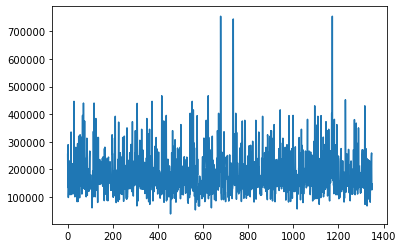

In [100]:
casas['SalePrice'].plot()